In [1]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pandas as pd

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image
import pydotplus
from matplotlib.pyplot import imshow

""" image trasformation packages """
from PIL import Image
import skimage.io as skio

""" statistical data visualization packages"""
import seaborn as sns

""" machine learning functions """
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
from funcoes import *

In [3]:
captchas_files = sorted(glob('../testes/captcha_teste*.png'))
imgs = skio.imread_collection(captchas_files)

In [4]:
unblobbed = [remove_small_blobs(img, min_area=50, background=255) for img in imgs]

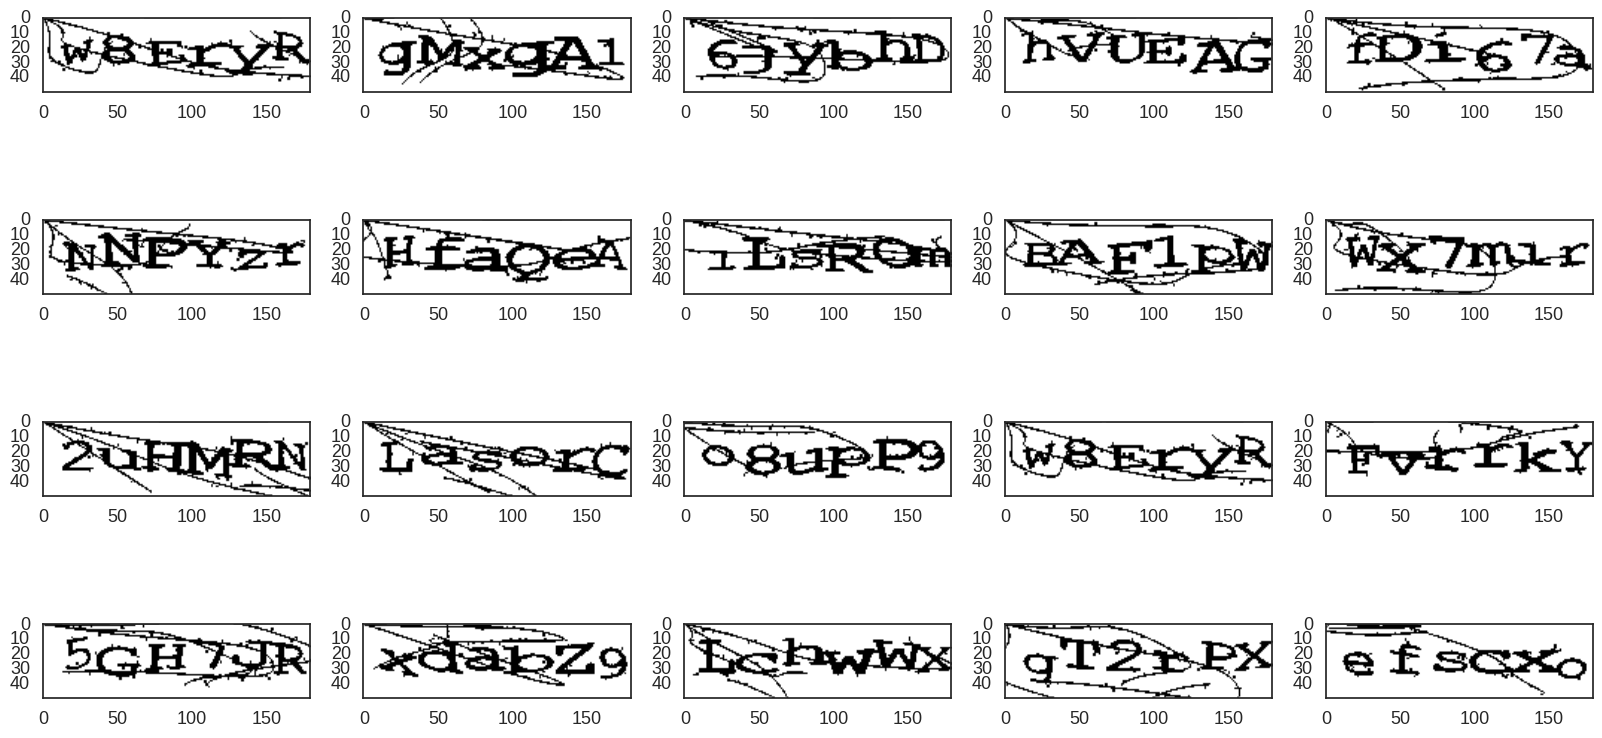

In [5]:
plot_captchas( unblobbed, (4, 5) )

In [6]:
certo = ['w8EryR', 'gMxgA1', '6jybhD', 'hVUEAG', 'fDi67a',
        'NNPYzr', 'HfaQeA', 'iLsROm', 'BAF1pW', 'Wx7m1r',
        '2uHMRN', 'Lasorc', 'o8upp9', 'w8EryR', 'FvrrkY',
        '5GH7JR', 'xdabZ9', 'Lchwwx', 'gT2rPX', 'efsCXo']

# Tentativa com Tesseract

In [7]:
%%time
%%capture
respostasTS = []
for i, captcha in enumerate(unblobbed):
    resposta = tsrct_captcha(captcha)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasTS.append(resposta)

CPU times: user 244 ms, sys: 492 ms, total: 736 ms
Wall time: 24.7 s


In [8]:
print(respostasTS)

['      ', '      ', '      ', '      ', '      ', '     ﬁf', '      ', '      ', 'E     ', '      ', '      ', '      ', '  A   ', '      ', '    7““? ', 'm     ', 'M     ', '      ', '      ', '      ']


# Tentativa com funções super_score

In [9]:
%%time
%%capture
respostasSS = []
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS.append(resposta)

CPU times: user 6min 11s, sys: 2.4 s, total: 6min 13s
Wall time: 6min 13s


In [10]:
print(respostasSS)

['x8HcYB', '1MkgA1', 'pjybhh', 'hVOBAC', 'tJ1w7a', 'rNFTzt', 'HfaQeA', 'gLzEUv', 'HAF1pB', 'kK7m11', '7uUMBn', '5sss1t', 'bEupP9', 'x8HcYB', 'xvtrk1', '91H7Jz', 'xdabCu', 'LzUwkA', 'gT3H1z', 'e1ccxs']


# Tentativa com funções super_score2

In [11]:
%%time
%%capture
respostasSS2 = []
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha2(captcha)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS2.append(resposta)

CPU times: user 4min 58s, sys: 1.19 s, total: 5min
Wall time: 5min


In [12]:
print(respostasSS2)

['OsFLOA', 'sRsWEv', 'T5rh7e', 'PsSiPe', '1LE3pY', 'kzECBn', 'Epars4', '1scRH5', 'stdtzw', 'r13vx2', 'OrvHhY', 'vzfGBr', 'E3iYr3', 'OsFLOA', '8irbPE', '5aJSrz', '85epov', 'FYnwPn', 'ntPCS7', 'sPCV7B']


# Tentativa com modelo ML

## Decision Tree

In [13]:
%%time
%%capture
respostasML1 = []
for i, captcha in enumerate(unblobbed):
    resposta = modela_captcha(captcha)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasML1.append(resposta)

CPU times: user 4min 52s, sys: 1.11 s, total: 4min 53s
Wall time: 4min 53s


In [14]:
print(respostasML1)

['v8hz88', 'akndpA', 'FAyA2h', 'sZNabL', 'BzsF73', 'shF1sz', '3zEzzU', '7HatEP', 'pNg1nZ', '3pE1sz', '1upnzA', 'nzsszc', 'qBzzNS', 'v8hz88', 'tyDrnu', 'U73sip', 'xzaazH', 'Hs3wph', 'sTxVvu', 'szakkg']


## Random Forest

In [15]:
%%time
%%capture
respostasML2 = []
for i, captcha in enumerate(unblobbed):
    resposta = modela_captcha(captcha, tipo = "RF")
    #print("resposta "+ str(i) + ": " + resposta)
    respostasML2.append(resposta)

CPU times: user 6min 11s, sys: 1.2 s, total: 6min 13s
Wall time: 6min 13s


In [16]:
print(respostasML2)

['     A', ' e   1', '  y p ', 'hVO   ', '  r 73', ' N    ', 'H a  A', 'x     ', '  F p ', '  7mG3', 'HuU   ', 'n  c  ', '8  p  ', '     A', ' v t  ', ' C    ', 'xd   u', '      ', 'gT    ', 'azb x ']


# Avaliação

In [17]:
ML1 = []
ML2 = []
tesseract = []
super_score = []
super_score2 = []
for i, captcha in enumerate(certo):

    ML1.append(0)
    ML2.append(0)
    tesseract.append(0)
    super_score.append(0)
    super_score2.append(0)
    
    for j, letra in enumerate(captcha):
        if (letra == respostasSS[i][j]):
            super_score[i] += 1
        if (letra == respostasML1[i][j]):
            ML1[i] += 1
        if (letra == respostasTS[i][j]):
            tesseract[i] += 1
        if (letra == respostasML2[i][j]):
            ML2[i] += 1
        if (letra == respostasSS2[i][j]):
            super_score2[i] += 1

In [18]:
print(tesseract)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
print("pontos totais: " + str(sum(tesseract)))

pontos totais: 0


In [20]:
print(ML2)

[0, 1, 1, 2, 1, 1, 3, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0]


In [21]:
print("pontos totais: " + str(sum(ML1)))

pontos totais: 13


In [22]:
print(ML1)

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0]


In [23]:
print("pontos totais: " + str(sum(ML1)))

pontos totais: 13


In [24]:
print(super_score)

[1, 4, 4, 3, 2, 2, 6, 1, 4, 3, 2, 1, 3, 1, 3, 3, 4, 2, 2, 1]


In [25]:
print("pontos totais: " + str(sum(super_score)))

pontos totais: 52


In [26]:
print(super_score2)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]


In [27]:
print("pontos totais: " + str(sum(super_score2)))

pontos totais: 5


# Conclusão

Técnica *super_score* obteve melhores resultados na previsão.